# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.12.0)


### Import Statements

In [204]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [205]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [206]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [207]:
print(df_data.shape)
print(df_data.columns)

print("")

(4324, 9)
Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')



In [208]:
print(f"NaN values? {df_data.isna().values.any()}")
print(f"Duplicates? {df_data.duplicated().values.any()}")

NaN values? True
Duplicates? False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [209]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [210]:
df_data.drop(["Unnamed: 0","Unnamed: 0.1"], axis=1, inplace=True)
df_data["Price"] = df_data["Price"].fillna(0)
df_data["Price"] = df_data["Price"].str.replace(",","")
df_data["Price"] = df_data["Price"].astype(float)

In [211]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success


## Descriptive Statistics

In [212]:
df_data.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [213]:
launches_by_organization = df_data["Organisation"].value_counts()

bar = px.bar(
    x=launches_by_organization.index,
    y=launches_by_organization.values,
    title="Launch Count by Organisation",
    hover_name=launches_by_organization.index,
    color=launches_by_organization.values,
    color_continuous_scale="Agsunset"
)

bar.update_layout(
    xaxis_title="Organisation",
    yaxis_title="Number of Launches",
    coloraxis_showscale=False
)

bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [214]:
rocket_status = df_data["Rocket_Status"].value_counts()

bar = px.bar(
    x=rocket_status.index,
    y=rocket_status.values,
    title="Number of Active vs Retired Rockets",
    hover_name=rocket_status.index,
    color=rocket_status.values,
    color_continuous_scale="Agsunset"
)

bar.update_layout(
    xaxis_title="Status",
    yaxis_title="Number of Rockets",
    coloraxis_showscale=False
)

bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [215]:
mission_status = df_data["Mission_Status"].value_counts()

bar = px.bar(
    x=mission_status.index,
    y=mission_status.values,
    title="Number of Successful vs Unsuccessful Missions",
    hover_name=mission_status.index,
    color=mission_status.values,
    color_continuous_scale="Agsunset"
)

bar.update_layout(
    xaxis_title="Status",
    yaxis_title="Number of Missions",
    coloraxis_showscale=False
)

bar.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

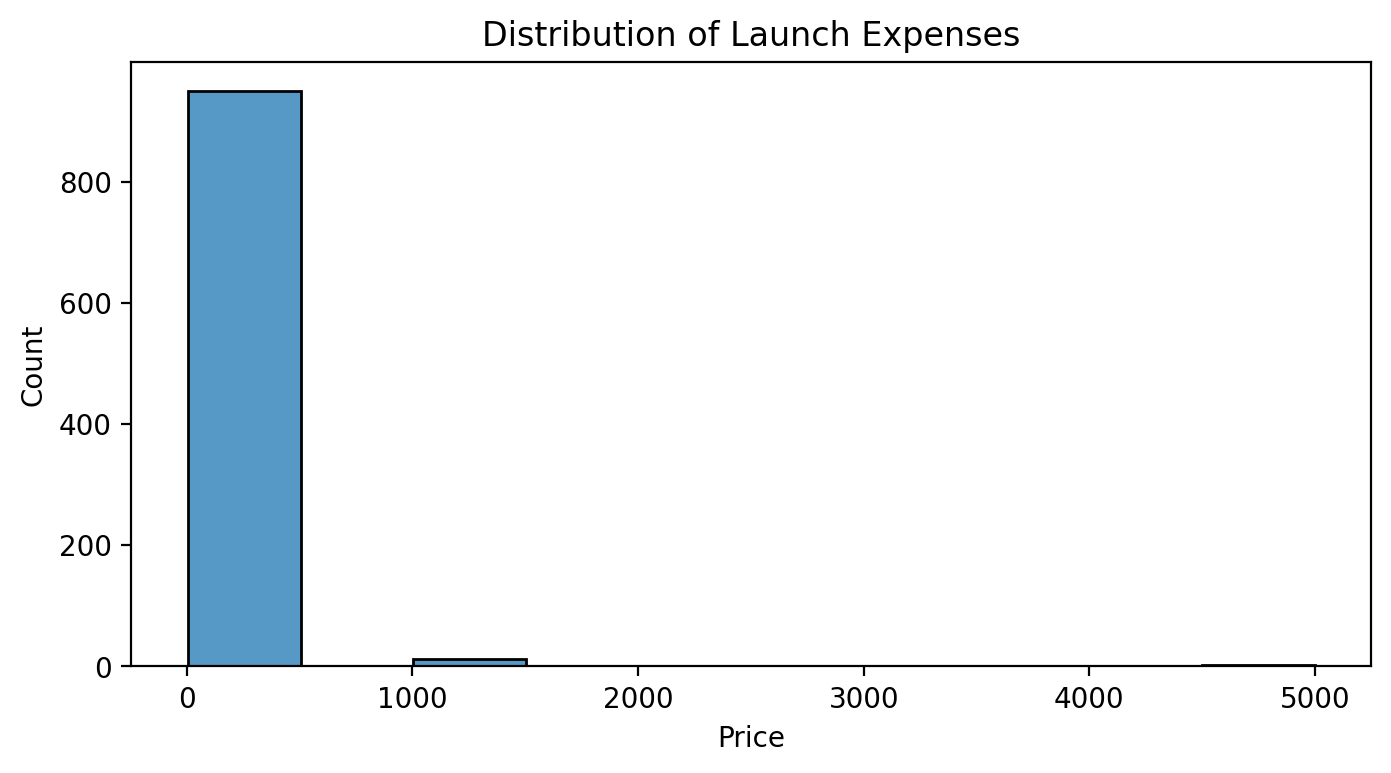

In [216]:
plt.figure(figsize=(8,4), dpi=200)

sns.histplot(
    data=df_data,
    x=df_data["Price"],
    bins=10
)

plt.xlabel("Price")
plt.title("Distribution of Launch Expenses")
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


from iso3166 import countriesYou can use the iso3166 package to convert the country names to Alpha3 format.

In [217]:
# Seperate the country from the location and create a new column.
df_data['launch_country'] = df_data["Location"].str.split(", ").str[-1]
 
# Replace bad data i.e outdated country names.
df_data['launch_country'].replace({"Shahrud Missile Test Site":"Iran, Islamic Republic of",
                                    'Gran Canaria': 'USA', 
                                   'Yellow Sea': 'China', 
                                  'Pacific Missile Range Facility': 'USA', 
                                   'Barents Sea': 'Russian Federation', 
                                  'Russia': 'Russian Federation', 
                                    'Pacific Ocean': 'USA', 
                                   'Marshall Islands': 'USA', 
                                   'Iran': 'Iran, Islamic Republic of', 
                                  'North Korea': "Korea, Democratic People's Republic of", 
                                   'South Korea': "Korea, Republic of",
                                  "New Mexico":"USA"}, 
                                  inplace=True)
 
# Use iso3166 to get alpha3 codes
df_data['launch_country_code'] = df_data['launch_country'].apply(lambda x: (countries.get(x).alpha3))
 
# Use groupby to get the total launches by country and country code.
df_launches = df_data.groupby(['launch_country', 'launch_country_code'], as_index=False).agg({'Mission_Status': pd.Series.count})
df_launches.rename(columns={'Mission_Status':'Total_launches'}, inplace=True)
 
# Check the table.
df_launches
 
# Deploy the map
px.choropleth(data_frame=df_launches, locations='launch_country_code', color='Total_launches', color_continuous_scale='matter')

# Use a Choropleth Map to Show the Number of Failures by Country


In [218]:
failures_by_country = df_data[df_data["Mission_Status"] == "Failure"]
failures_by_country = failures_by_country.groupby("launch_country_code")["launch_country_code"].count().rename_axis("launch_country_code").reset_index(name='counts')
failures_by_country

,launch_country_code,counts
0,AUS,3
1,BRA,2
2,CHN,19
3,FRA,13
4,IND,8
5,IRN,8
6,ISR,2
7,JPN,10
8,KAZ,72
9,KOR,2


In [219]:
# Deploy the map
px.choropleth(data_frame=failures_by_country, locations='launch_country_code', color='counts', color_continuous_scale='matter')

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [220]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,launch_country,launch_country_code
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ


In [221]:
burst = px.sunburst(
    df_data,
    path=["launch_country_code","Organisation","Mission_Status"],
    values="Price",
    title="Mission Prices by Country, Organisation, and Mission Status"
)

burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [222]:
prices_by_organisation = df_data.groupby("Organisation")["Price"].sum().rename_axis("Organisation").reset_index(name='sum')
prices_by_organisation

,Organisation,sum
0,AEB,0.00
1,AMBA,0.00
2,ASI,0.00
3,Arianespace,"16,345.00"
4,Arm??e de l'Air,0.00
5,Blue Origin,0.00
6,Boeing,"1,241.00"
7,CASC,"6,340.26"
8,CASIC,0.00
9,CECLES,0.00


In [223]:
bar = px.bar(
    x=prices_by_organisation["Organisation"],
    y=prices_by_organisation["sum"],
    title="Mission Expenses by Organisation",
    hover_name=prices_by_organisation["Organisation"],
    color=prices_by_organisation["sum"],
    color_continuous_scale="matter"
)

bar.update_layout(
    xaxis_title="Organisation",
    yaxis_title="Total Cost",
    coloraxis_showscale=False
)

bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [224]:
prices_per_launch_by_organisation = df_data.groupby("Organisation").agg({"Date":pd.Series.count, "Price":pd.Series.sum})
prices_per_launch_by_organisation["Price_Per_Launch"] = prices_per_launch_by_organisation["Price"] / prices_per_launch_by_organisation["Date"] 
prices_per_launch_by_organisation.head()

,Date,Price,Price_Per_Launch
Organisation,,,
AEB,3,0.00,0.00
AMBA,8,0.00,0.00
ASI,9,0.00,0.00
Arianespace,279,"16,345.00",58.58
Arm??e de l'Air,4,0.00,0.00


In [225]:
bar = px.bar(
    x=prices_per_launch_by_organisation.index,
    y=prices_per_launch_by_organisation["Price_Per_Launch"],
    title="Mission Expenses by Organisation per Launch",
    hover_name=prices_per_launch_by_organisation.index,
    color=prices_per_launch_by_organisation["Price_Per_Launch"],
    color_continuous_scale="matter"
)

bar.update_layout(
    xaxis_title="Organisation",
    yaxis_title="Cost per Launch",
    coloraxis_showscale=False
)

bar.show()

# Chart the Number of Launches per Year

In [226]:
# Get year for each date
df_data[["Date1", "Date2"]] = df_data["Date"].str.split(",",expand=True)
df_data["year"] = df_data["Date2"].str[:5]
df_data["year"] = pd.to_numeric(df_data["year"])

# Drop unneeded columns
df_data.drop(["Date1", "Date2"], axis=1, inplace=True)

num_launches_per_year = df_data["year"].value_counts()
num_launches_per_year

1971    119
2018    117
1977    114
1975    113
1976    113
       ... 
2010     37
2005     37
1958     28
1959     20
1957      3
Name: year, Length: 64, dtype: int64

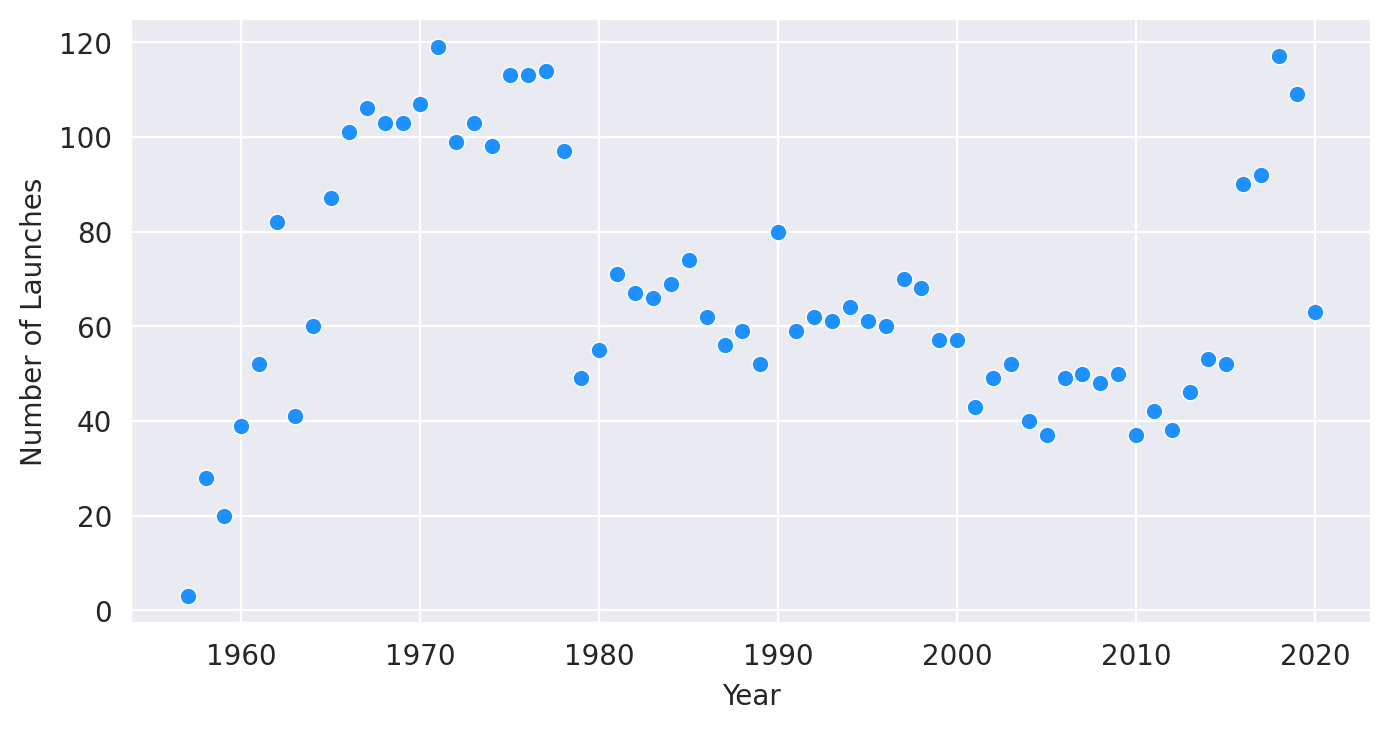

In [227]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(
        data=num_launches_per_year,
        x=num_launches_per_year.index,
        y=num_launches_per_year.values,
        color="dodgerblue"
    )

    ax.set(
        xlabel="Year",
        ylabel="Number of Launches"
    )

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [228]:
df_data[["Date1", "Date2"]] = df_data["Date"].str.split(",",expand=True)
df_data.drop(["Date2"], axis=1, inplace=True)
df_data[["Date1", "month", "Date3"]] = df_data["Date1"].str.split(" ",expand=True)
df_data.drop(["Date1","Date3"], axis=1, inplace=True)

num_launches_per_month = df_data["month"].value_counts()
num_launches_per_month

Dec    450
Jun    402
Apr    383
Oct    381
Aug    373
Sep    365
Mar    353
Jul    351
Feb    336
Nov    336
May    326
Jan    268
Name: month, dtype: int64

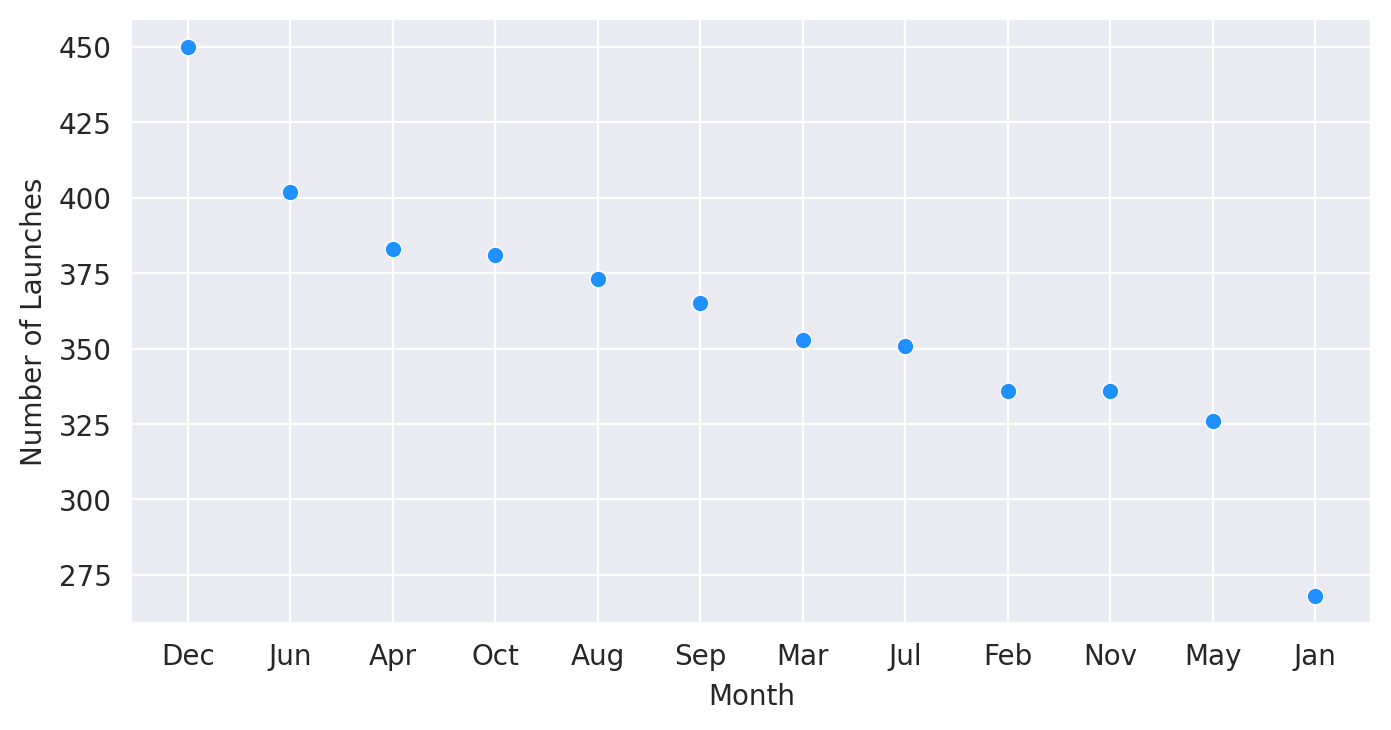

In [229]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(
        data=num_launches_per_month,
        x=num_launches_per_month.index,
        y=num_launches_per_month.values,
        color="dodgerblue"
    )

    ax.set(
        xlabel="Month",
        ylabel="Number of Launches"
    )

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

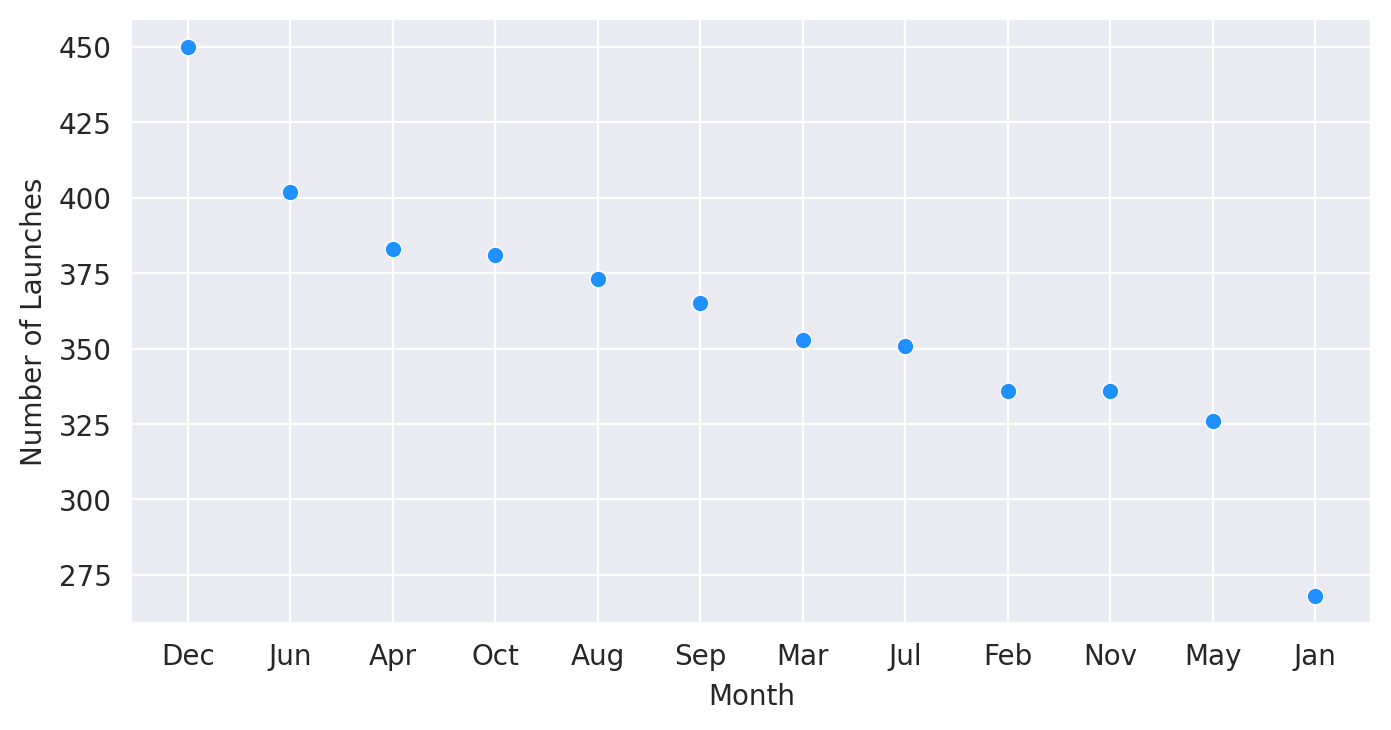

In [230]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(
        data=num_launches_per_month,
        x=num_launches_per_month.index,
        y=num_launches_per_month.values,
        color="dodgerblue"
    )

    ax.set(
        xlabel="Month",
        ylabel="Number of Launches"
    )

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [231]:
prices_per_launch_by_year = df_data.groupby("year").agg({"Date":pd.Series.count, "Price":pd.Series.sum})
prices_per_launch_by_year["Price_Per_Launch"] = prices_per_launch_by_year["Price"] / prices_per_launch_by_year["Date"] 
prices_per_launch_by_year.head()

,Date,Price,Price_Per_Launch
year,,,
1957,3,0.00,0.00
1958,28,0.00,0.00
1959,20,0.00,0.00
1960,39,0.00,0.00
1961,52,0.00,0.00


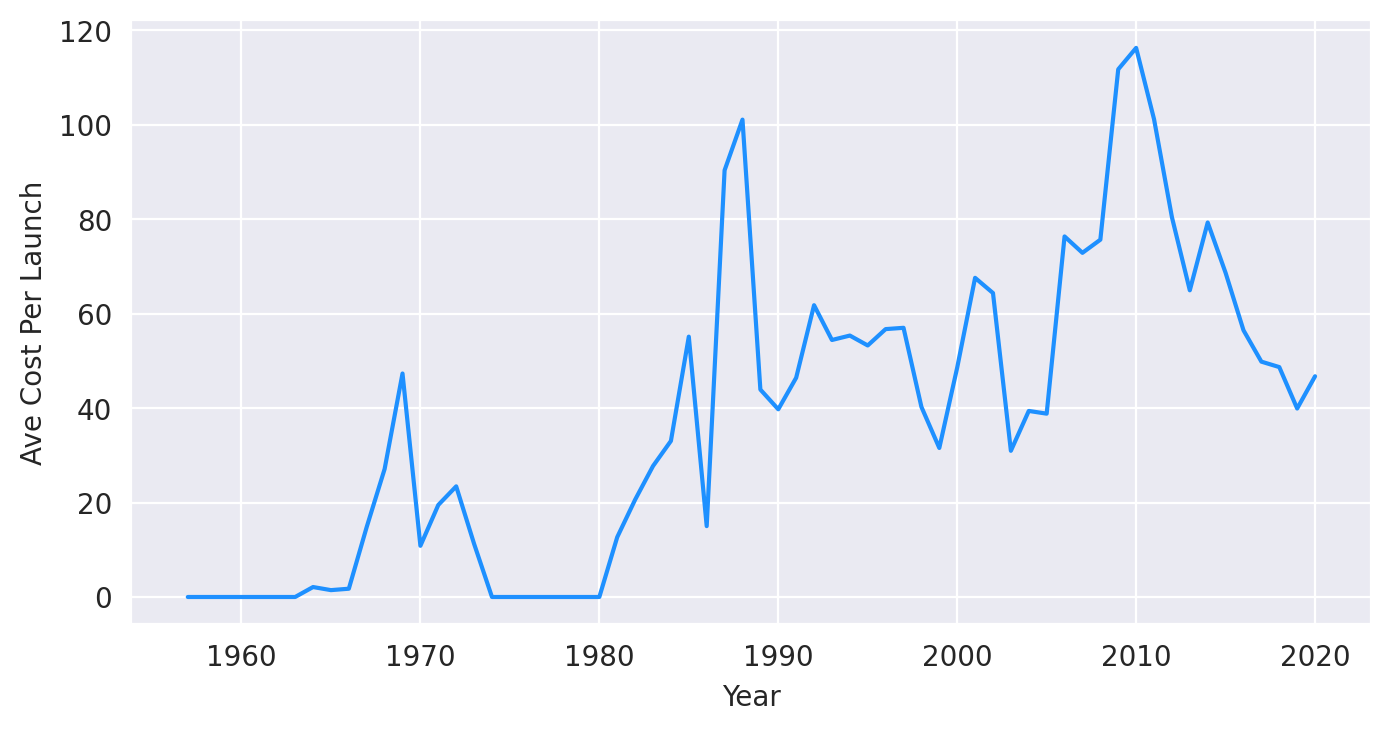

In [232]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.lineplot(
        data=prices_per_launch_by_year,
        x=prices_per_launch_by_year.index,
        y=prices_per_launch_by_year["Price_Per_Launch"],
        color="dodgerblue"
    )

    ax.set(
        xlabel="Year",
        ylabel="Ave Cost Per Launch"
    )

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [233]:
launches_by_year_by_org = df_data.groupby(["Organisation", "year"]).agg({"Date":pd.Series.count}).reset_index()
launches_by_year_by_org.head()

,Organisation,year,Date
0,AEB,1997,1
1,AEB,1999,1
2,AEB,2003,1
3,AMBA,1958,7
4,AMBA,1967,1


In [234]:
line_chart = px.line(
    launches_by_year_by_org,
    x=launches_by_year_by_org["year"],
    y=launches_by_year_by_org["Date"],
    color=launches_by_year_by_org["Organisation"],
    hover_name=launches_by_year_by_org["Organisation"]
)

line_chart.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Launches"
)

line_chart.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [235]:
cold_war = df_data[df_data["year"] <= 1991]
cold_war = cold_war[(cold_war["launch_country"] == "USA") | (cold_war["launch_country"] == "Russian Federation")]
cold_war

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,launch_country,launch_country_code,year,month
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia","Wed Dec 18, 1991 03:54 UTC",Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,Russian Federation,RUS,1991,Dec
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA","Sat Dec 07, 1991 22:47 UTC",Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,USA,1991,Dec
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Thu Nov 28, 1991 13:23 UTC",Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA,USA,1991,Nov
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Wed Nov 27, 1991 03:30 UTC",Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,Russian Federation,RUS,1991,Nov
1724,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Nov 24, 1991 23:44 UTC",Space Shuttle Atlantis | STS-44,StatusRetired,450.00,Success,USA,USA,1991,Nov
...,...,...,...,...,...,...,...,...,...,...,...
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Mon Mar 17, 1958 12:15 UTC",Vanguard | Vanguard 1,StatusRetired,NaN,Success,USA,USA,1958,Mar
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Wed Mar 05, 1958 18:27 UTC",Juno I | Explorer 2,StatusRetired,NaN,Failure,USA,USA,1958,Mar
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958,Feb
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958,Feb


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [236]:
num_cold_war_launches = cold_war["launch_country"].value_counts()

fig = px.pie(
    labels=num_cold_war_launches.index,
    values=num_cold_war_launches.values,
    title="USSR vs USA Launches",
    names=num_cold_war_launches.index
)

fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [237]:
cold_war_launches_per_year = cold_war.groupby(["launch_country", "year"]).agg({"Date":pd.Series.count}).reset_index()
cold_war_launches_per_year.head()

,launch_country,year,Date
0,Russian Federation,1961,2
1,Russian Federation,1962,8
2,Russian Federation,1963,8
3,Russian Federation,1964,8
4,Russian Federation,1965,10


In [238]:
line_chart = px.line(
    cold_war_launches_per_year,
    x=cold_war_launches_per_year["year"],
    y=cold_war_launches_per_year["Date"],
    color=cold_war_launches_per_year["launch_country"],
    hover_name=cold_war_launches_per_year["launch_country"]
)

line_chart.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Launches"
)

line_chart.show()

## Chart the Total Number of Mission Failures Year on Year.

In [239]:
cold_war_launches_per_year_failures = cold_war[cold_war["Mission_Status"] == "Failure"]

cold_war_launches_per_year_failures = cold_war_launches_per_year_failures.groupby(["launch_country", "year"]).agg({"Date":pd.Series.count}).reset_index()
cold_war_launches_per_year_failures.head()

,launch_country,year,Date
0,Russian Federation,1961,2
1,Russian Federation,1962,1
2,Russian Federation,1963,4
3,Russian Federation,1964,1
4,Russian Federation,1965,3


In [240]:
line_chart = px.line(
    cold_war_launches_per_year_failures,
    x=cold_war_launches_per_year_failures["year"],
    y=cold_war_launches_per_year_failures["Date"],
    color=cold_war_launches_per_year_failures["launch_country"],
    hover_name=cold_war_launches_per_year_failures["launch_country"]
)

line_chart.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Launches"
)

line_chart.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [241]:
cold_war_launches_per_year_percentage = pd.merge(cold_war_launches_per_year, cold_war_launches_per_year_failures, on=["launch_country","year"])
cold_war_launches_per_year_percentage["percent_failure"] = cold_war_launches_per_year_percentage["Date_y"] / cold_war_launches_per_year_percentage["Date_x"]
cold_war_launches_per_year_percentage.drop(["Date_x","Date_y"], axis=1, inplace=True)
cold_war_launches_per_year_percentage.head()

,launch_country,year,percent_failure
0,Russian Federation,1961,1.00
1,Russian Federation,1962,0.12
2,Russian Federation,1963,0.50
3,Russian Federation,1964,0.12
4,Russian Federation,1965,0.30


In [242]:
line_chart = px.line(
    cold_war_launches_per_year_percentage,
    x=cold_war_launches_per_year_percentage["year"],
    y=cold_war_launches_per_year_percentage["percent_failure"],
    color=cold_war_launches_per_year_percentage["launch_country"],
    hover_name=cold_war_launches_per_year_percentage["launch_country"]
)

line_chart.update_layout(
    xaxis_title="Year",
    yaxis_title="Failure Percentage"
)

line_chart.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [243]:
launches_by_year_by_country = df_data.groupby(["launch_country", "year"]).agg({"Date":pd.Series.count}).reset_index()
launches_by_year_by_country.head()

,launch_country,year,Date
0,Australia,1967,1
1,Australia,1968,1
2,Australia,1969,1
3,Australia,1970,2
4,Australia,1971,1


In [244]:
line_chart = px.line(
    launches_by_year_by_country,
    x=launches_by_year_by_country["year"],
    y=launches_by_year_by_country["Date"],
    color=launches_by_year_by_country["launch_country"],
    hover_name=launches_by_year_by_country["launch_country"]
)

line_chart.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Launches"
)

line_chart.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [245]:
line_chart = px.line(
    launches_by_year_by_org,
    x=launches_by_year_by_org["year"],
    y=launches_by_year_by_org["Date"],
    color=launches_by_year_by_org["Organisation"],
    hover_name=launches_by_year_by_org["Organisation"]
)

line_chart.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Launches"
)

line_chart.show()